# Data analysis quiz for Curing Tompany

In [2]:
import pandas as pd
cardio_alco = pd.read_csv('1.csv')
cardio_base = pd.read_csv('2.csv')
covid_data = pd.read_csv('3.csv')

## Find the age group with the highest and lowest average weight
## Calculate the difference in weight between the two age groups as a percentage

In [3]:
# Create a new column for age in years
cardio_base['age'] = round(cardio_base['age'] / 365.25)

# Calculate the average weight by age group
avg_weight_by_age = cardio_base.groupby('age')['weight'].mean()

# Find the age group with the highest and lowest average weight
age_with_highest_weight = avg_weight_by_age.idxmax()
age_with_lowest_weight = avg_weight_by_age.idxmin()

# Calculate the difference in weight between the two age groups as a percentage
weight_difference = (avg_weight_by_age[age_with_highest_weight] - avg_weight_by_age[age_with_lowest_weight]) / avg_weight_by_age[age_with_lowest_weight] * 100

print("The age group with the highest average weight is {} years old.".format(age_with_highest_weight))
print("The age group with the lowest average weight is {} years old.".format(age_with_lowest_weight))
print("The difference in weight between the two groups is {:.2f}% heavier.".format(weight_difference))

The age group with the highest average weight is 61.0 years old.
The age group with the lowest average weight is 30.0 years old.
The difference in weight between the two groups is 12.03% heavier.


## do people over 50 has higher cholesterol levels

In [4]:
# Group the data by age and calculate the average cholesterol level for each age group
avg_cholesterol_by_age = cardio_base.groupby('age')['cholesterol'].mean()

# Calculate the average cholesterol level for people over 50 and under 50
avg_cholesterol_over_50 = avg_cholesterol_by_age[avg_cholesterol_by_age.index > 50].mean()
avg_cholesterol_under_50 = avg_cholesterol_by_age[avg_cholesterol_by_age.index <= 50].mean()

# Compare the average cholesterol levels for people over 50 to those under 50
if avg_cholesterol_over_50 > avg_cholesterol_under_50:
    print("People over 50 have higher cholesterol levels.")
else:
    print("People over 50 do not have higher cholesterol levels.")

# Calculate the percentage of people over 50 with high cholesterol (level 2 or 3)
num_over_50 = cardio_base[cardio_base['age'] > 50].shape[0]
num_high_cholesterol_over_50 = cardio_base[(cardio_base['age'] > 50) & (cardio_base['cholesterol'] >= 2)].shape[0]
pct_high_cholesterol_over_50 = num_high_cholesterol_over_50 / num_over_50 * 100

print("{:.2f}% of people over 50 have high cholesterol.".format(pct_high_cholesterol_over_50))

People over 50 have higher cholesterol levels.
28.55% of people over 50 have high cholesterol.


## are men more likely to be a smoker?

In [5]:
# Group the data by gender and count the number of smokers for each group
smokers_by_gender = cardio_base.groupby(['gender'])['smoke'].sum()

# Calculate the total number of smokers and non-smokers
total_smokers = smokers_by_gender.sum()
total_non_smokers = cardio_base.shape[0] - total_smokers

# Calculate the percentage of male smokers and the percentage of female smokers
pct_male_smokers = smokers_by_gender[2] / total_smokers * 100
pct_female_smokers = smokers_by_gender[1] / total_smokers * 100

if pct_male_smokers > pct_female_smokers:
    ratio = pct_male_smokers / pct_female_smokers
    print("Yes, men are smokers {:.0f}x more than women.".format(ratio))
else:
    ratio = pct_female_smokers / pct_male_smokers
    print("No, men are not smokers more than women. Women are smokers {:.0f}x more than men.".format(ratio))

Yes, men are smokers 7x more than women.


## the percentage of female smokers

In [7]:
# Count the number of female smokers
female_smokers = cardio_base[(cardio_base['gender'] == 1) & (cardio_base['smoke'] == 1)].shape[0]

# Calculate the percentage of female smokers
pct_female_smokers = female_smokers / cardio_base[cardio_base['gender'] == 1].shape[0] * 100

# Print the percentage of female smokers
print("{:.2f}% of women are smokers.".format(pct_female_smokers))

1.79% of women are smokers.


## how tall are 1% tallest people?

In [8]:
# Calculate the height at the 99th percentile
height_99th = cardio_base['height'].quantile(0.99)

print("The height of the 1% tallest people is {:.1f} cm.".format(height_99th))

The height of the 1% tallest people is 184.0 cm.


## Find the features with the highest Spearman rank correlation

In [10]:
# Calculate the Spearman rank correlation coefficients between all pairs of features
corr_matrix = cardio_base.corr(method='spearman')

# Identify the pairs of features with the highest correlation coefficients
top_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
top_corr = top_corr[top_corr != 1].reset_index()
top_corr.columns = ['Feature 1', 'Feature 2', 'Spearman rank correlation']
top_corr = top_corr.iloc[0]

print("The features with the highest Spearman rank correlation are '{}' and '{}' with a correlation coefficient of {:.2f}.".format(top_corr[0], top_corr[1], top_corr[2]))


The features with the highest Spearman rank correlation are 'ap_hi' and 'ap_lo' with a correlation coefficient of 0.74.


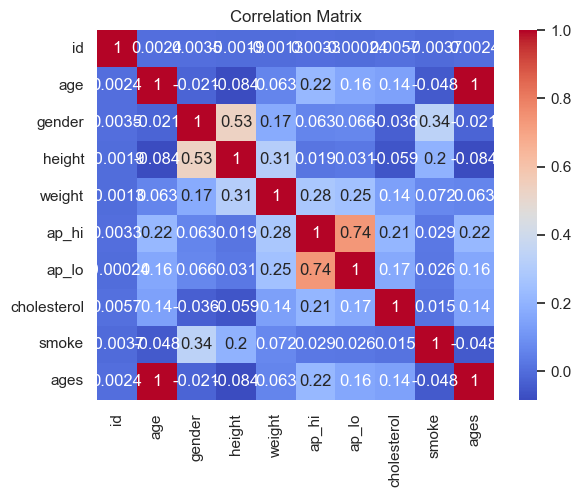

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

# Set the title of the plot
plt.title("Correlation Matrix")

# Show the plot
plt.show()


## Calculate the percentage of people whose height is more than 2 standard deviations away from the mean

In [12]:
# Calculate the mean and standard deviation of the height column
mean_height = cardio_base['height'].mean()
std_height = cardio_base['height'].std()

# Calculate the normalized deviation of each height from the mean
deviation = cardio_base['height'].abs().sub(mean_height).div(std_height)

# Calculate the percentage of people whose height is more than 2 standard deviations away from the mean
pct_more_than_2std = (deviation > 2).mean() * 100

print("{:.2f}% of people are more than 2 standard deviations away from the average height.".format(pct_more_than_2std))

2.06% of people are more than 2 standard deviations away from the average height.


## Merge dataframes

In [13]:
# Split the 'id;alco' column into separate 'id' and 'alco' columns in cardio_alco
cardio_alco[['id', 'alco']] = cardio_alco['id;alco'].str.split(';', expand=True)

# Convert 'id' column to numeric data type to match the 'id' column in cardio_base
cardio_alco['id'] = pd.to_numeric(cardio_alco['id'], errors='coerce')

# Merge the two dataframes on the 'id' column, keeping only matching rows
merged_df = pd.merge(cardio_base, cardio_alco, on='id', how='inner')

# Drop the original 'id;alco' column since it is no longer needed
merged_df.drop(columns=['id;alco'], inplace=True)

# Convert the 'alco' column to integer data type
merged_df['alco'] = pd.to_numeric(merged_df['alco'], errors='coerce')

## Calculate the percentage of people over 50 who consume alcohol

In [14]:
# Filter the data for people over 50 years old

df = merged_df
over_50 = df[df['age'] > 50]

# Calculate the total number of people over 50 who consume alcohol
over_50_alcohol = over_50[over_50['alco'] == 1]['id'].count()

# Calculate the percentage of people over 50 who consume alcohol
pct_over_50_alcohol = over_50_alcohol / over_50.shape[0] * 100

print("{:.2f}% of people over 50 years old consume alcohol.".format(pct_over_50_alcohol))

4.92% of people over 50 years old consume alcohol.


In [17]:
import warnings
warnings.filterwarnings('ignore')


## Check/ Smokers have higher blood pressure than non-smokers with 95% confidence
##              Smokers have higher cholesterol levels than non-smokers with 95% confidence

In [19]:
import scipy.stats as stats

# Test 1: Smokers have higher blood pressure than non-smokers
smokers_bp = df.loc[df['smoke'] == 1, ['ap_hi', 'ap_lo']]
non_smokers_bp = df.loc[df['smoke'] == 0, ['ap_hi', 'ap_lo']]

smokers_mean_bp = smokers_bp.mean().mean()
non_smokers_mean_bp = non_smokers_bp.mean().mean()

smokers_std_bp = smokers_bp.stack().std()
non_smokers_std_bp = non_smokers_bp.stack().std()

# calculate 95% confidence intervals for the mean difference
diff_mean_bp = smokers_mean_bp - non_smokers_mean_bp
se_mean_diff_bp = ((smokers_std_bp**2 / smokers_bp.size) + (non_smokers_std_bp**2 / non_smokers_bp.size))**0.5
ci_mean_diff_bp = stats.t.interval(alpha=0.95, df=(smokers_bp.size + non_smokers_bp.size - 2), loc=diff_mean_bp, scale=se_mean_diff_bp)

if ci_mean_diff_bp[0] > 0:
    print("Smokers have higher blood pressure than non-smokers with 95% confidence.")
else:
    print("There is no significant difference in blood pressure between smokers and non-smokers.")

# Test 2: Smokers have higher cholesterol level than non-smokers
smokers_chol = df.loc[df['smoke'] == 1, 'cholesterol']
non_smokers_chol = df.loc[df['smoke'] == 0, 'cholesterol']

smokers_mean_chol = smokers_chol.mean()
non_smokers_mean_chol = non_smokers_chol.mean()

smokers_std_chol = smokers_chol.std()
non_smokers_std_chol = non_smokers_chol.std()

# calculate 95% confidence intervals for the mean difference
diff_mean_chol = smokers_mean_chol - non_smokers_mean_chol
se_mean_diff_chol = ((smokers_std_chol**2 / smokers_chol.size) + (non_smokers_std_chol**2 / non_smokers_chol.size))**0.5
ci_mean_diff_chol = stats.t.interval(alpha=0.95, df=(smokers_chol.size + non_smokers_chol.size - 2), loc=diff_mean_chol, scale=se_mean_diff_chol)

if ci_mean_diff_chol[0] > 0:
    print("Smokers have higher cholesterol levels than non-smokers with 95% confidence.")
else:
    print("There is no significant difference in cholesterol levels between smokers and non-smokers.")

There is no significant difference in blood pressure between smokers and non-smokers.
Smokers have higher cholesterol levels than non-smokers with 95% confidence.


## When did the difference in the total number of confirmed cases between Italy and Germany become more than 10 000?

In [29]:
# Filter the dataframe to only include data for Italy and Germany.
italy_germany = covid_data[(covid_data.location == 'Italy') | (covid_data.location == 'Germany')]

# Group the data by date and location, and calculate the sum of new cases.
grouped = italy_germany.groupby(['date', 'location'])['new_cases'].sum().reset_index()

# Pivot the table so that the columns are the location and the values are the total number of new cases.
pivoted = grouped.pivot(index='date', columns='location', values='new_cases').reset_index()

# Calculate the cumulative sum of new cases for each country.
pivoted['total_cases_Italy'] = pivoted['Italy'].cumsum()
pivoted['total_cases_Germany'] = pivoted['Germany'].cumsum()

# Select the columns for the final dataframe.
result = pivoted[['date', 'total_cases_Italy', 'total_cases_Germany']]

result['differ'] = result['total_cases_Italy'] - result['total_cases_Germany']

result[result['differ'] > 10000]


location,date,total_cases_Italy,total_cases_Germany,differ
72,2020-03-12,12462,1567,10895
73,2020-03-13,15113,2369,12744
74,2020-03-14,17660,3062,14598
75,2020-03-15,21157,3795,17362
76,2020-03-16,23980,4838,19142
...,...,...,...,...
158,2020-06-06,234531,183678,50853
159,2020-06-07,234801,183979,50822
160,2020-06-08,234998,184193,50805
161,2020-06-09,235278,184543,50735


## What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

In [31]:
import numpy as np
from scipy.optimize import curve_fit

# Filter the dataframe to only include data for Italy between 2020-02-28 and 2020-03-20.
italy_data = covid_data[(covid_data.location == 'Italy') & (covid_data.date >= '2020-02-28') & (covid_data.date <= '2020-03-20')]

# Calculate the cumulative sum of new cases for each day.
cumulative_cases = italy_data['new_cases'].cumsum()

# Define the exponential function.
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Fit the exponential function to the cumulative cases.
params, _ = curve_fit(exponential_func, range(len(cumulative_cases)), cumulative_cases)

# Calculate the fitted values for the exponential function.
fitted_values = exponential_func(range(len(cumulative_cases)), *params)

# Calculate the difference between the fitted exponential curve and the actual cumulative cases on 2020-03-20.
real_cases = italy_data[italy_data.date == '2020-03-20']['new_cases'].sum()
fitted_cases = int(fitted_values[-1])
difference = real_cases - fitted_cases

print("The difference between the exponential curve and the total number of real cases on 2020-03-20 is:", difference)

The difference between the exponential curve and the total number of real cases on 2020-03-20 is: -37024


## which country has the third highest death rate?

In [32]:
# Calculate the death rate for each country and store it in a new column called 'death_rate'.
covid_data['death_rate'] = covid_data['new_deaths'] / covid_data['population'] * 100

# Group the data by location and calculate the mean death rate for each country.
mean_death_rates = covid_data.groupby('location')['death_rate'].mean()

# Sort the death rates in descending order and select the third country in the list.
third_highest_country = mean_death_rates.sort_values(ascending=False).index[2]

print(third_highest_country)

Belgium


## What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants.

In [33]:
# Filter the data based on the condition B
filtered_data = covid_data[covid_data['hospital_beds_per_thousand'] >= 5]

# Calculate the joint probability P(A and B)
joint_prob = filtered_data[filtered_data['gdp_per_capita'] > 10000].shape[0] / covid_data.shape[0]

# Calculate the marginal probability P(B)
marginal_prob = filtered_data.shape[0] / covid_data.shape[0]

# Calculate the conditional probability P(A | B)
conditional_prob = joint_prob / marginal_prob

print("The probability that a country has GDP over $10,000, given that they have at least 5 hospital beds per 1000 inhabitants, is", conditional_prob)


The probability that a country has GDP over $10,000, given that they have at least 5 hospital beds per 1000 inhabitants, is 0.8565304372677908
